#### Chapter3 신경망
#### 3.1 퍼셉트론에서 신경망으로
- 입력층, 은닉층, 출력층 존재
##### 3.1.2 퍼셉트론 복습
- b(편향), w(가중치)
##### 3.1.3  활성화 함수의 등장
- 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수

ex) a = b + w1x1 + w2x2

y = h(a)

#### 3.2 활성화 함수
- 계단 함수 : 임계값을 경계로 출력이 바뀌는 함수
##### 3.2.1 시그모이드 함수
- $ h(x)$ = $\frac{1}{1 + exp^(-x)}$
##### 3.2.2 계단 함수 구현하기

In [12]:
import numpy as np

In [13]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

# 인수 x는 실수(부동소수점)만 받아들임
# 넘파이 배열을 인수로 넣을 수 없음

In [14]:
# 수정
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [15]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [16]:
y = x > 0
y

array([False,  True,  True])

In [17]:
y = y.astype(np.int)
y

<ipython-input-17-9f962d9dbdc0>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

##### 3.2.3 계단 함수의 그래프

In [18]:
import matplotlib.pylab as plt

In [19]:
def step_function(x):
    return np.array(x > 0, dtype = np.int)

In [20]:
#             start, end, step
x = np.arange(-5.0, 5.0, 0.1)
x

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [21]:
y1 = step_function(x)

<ipython-input-19-bb3af30ac512>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


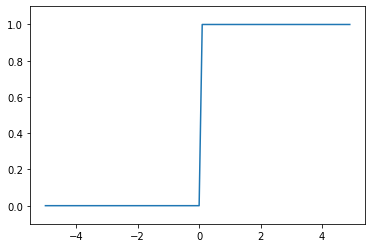

In [22]:
plt.plot(x, y1)
plt.ylim(-0.1, 1.1)     # y축의 범위 지정
plt.show()

☑️ 0을 경계로 출력이 0에서 1로 바뀜

##### 3.2.4 시그모이드 함수 구현하기

In [23]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [24]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [25]:
x = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x)

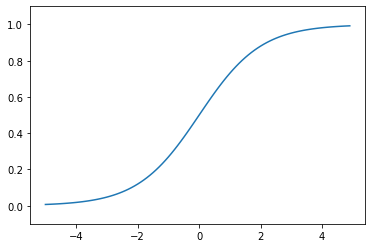

In [26]:
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)     # y축 범위 지정
plt.show()

##### 3.2.5 시그모이드 함수와 계단 함수 비교

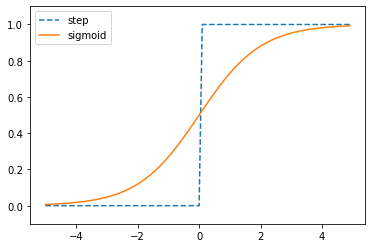

In [27]:
plt.plot(x, y1, linestyle = '--', label = 'step')
plt.plot(x, y2, label = 'sigmoid')
plt.ylim(-0.1, 1.1)     # y축 범위 지정
plt.legend()
plt.show()

☑️ 두 함수의 차이점
|계단 함수|시그모이드 함수|
|---|---|
|`0을 경계`로 출력이 갑자기 바뀜|부드러운 `곡선`, 출력이 `연속적`으로 변화|
|`0`과 `1` 중 하나의 값만 돌려줌|`실수`를 돌려줌|

☑️ 두 함수의 공통점

1. 입력이 작을 때의 출력은 0에 가깝고 입력이 커지면 1에 가까워지는 구조
2. 입력이 아무리 작거나 커도 출력은 0에서 1 사이

##### 3.2.6 비선형 함수
☑️ 비선형 함수 : 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류됨

##### 3.2.7 ReLU 함수
☑️ ReLU 함수 : 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

☑️ $y=
\begin{cases}
x,\;x>0\\
0,\;x\leqslant0
\end{cases}$

In [28]:
def relu(x):
    return np.maximum(0, x)

#### 3.3 다차원 배열의 계산
##### 3.3.1 다차원 배열

In [29]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [30]:
# 배열의 차원
np.ndim(A)

1

In [31]:
# 배열의 형상
# 튜플 반환!
A.shape

(4,)

In [32]:
# 원소 갯수
A.shape[0]

4

In [33]:
# 2차원 배열( =행렬 )
# 가로 = 행, 세로 = 열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [34]:
np.ndim(B)

2

In [35]:
B.shape

(3, 2)

##### 3.2.2 행렬의 곱

In [36]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [37]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [38]:
# 두 행렬의 곱 - np.dot() 함수
# np.dot(A, B)와 np.dot(B, A)의 결과는 다를 수 있음
# 2 X 2 행렬의 곱
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [39]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [40]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [41]:
# 2 X 3 행렬과 3 X 2 행렬의 곱
np.dot(A, B)

array([[22, 28],
       [49, 64]])

☑️ 행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 함

In [42]:
# 2 X 3 행렬 A와 2 X 2 행렬 C를 곱할 경우
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [43]:
A.shape

(2, 3)

In [44]:
# np.dot(A, C)    # Error 발생!

☑️ A가 2차원 행렬, B가 1차원 배열일 때도 대응하는 차원의 원소 수 일치시키기

In [45]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [46]:
B = np.array([7, 8])
B.shape

(2,)

In [47]:
np.dot(A, B)

array([23, 53, 83])

##### 3.3.3 신경망에서의 행렬 곱

In [48]:
X = np.array([1, 2])
X.shape

(2,)

In [49]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [50]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


#### 3.4 3층 신경망 구현하기
##### 3.4.1 표기법 설명
$ w_{12} ^ {(1)} $
- (1) : 1층의 가중치
- 1 : 다음 층의 1번째 뉴런
- 2 : 앞 층의 2번째 뉴런
##### 3.4.2 각 층의 신호 전달 구현하기
$ A^{(1)} = XW^{(1)} + B^{(1)} $

$$ A^{(1)} = \begin{pmatrix}
a_1^{(1)} & a_2^{(1)} & a_3^{(1)}
\end{pmatrix}$$

$$ X = \begin{pmatrix}
x_1 & x_2
\end{pmatrix}$$

$$ B^{(1)} = \begin{pmatrix}
b_1^{(1)} & b_2^{(1)} & b_3^{(1)}
\end{pmatrix}$$

$$ W^{(1)} = \begin{pmatrix}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)}\\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}$$

In [51]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


☑️ 입력층에서 1층으로의 신호 전달

In [52]:
A1 = np.dot(X, W1) + B1

In [53]:
Z1 = sigmoid(A1)

In [54]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


☑️ 1층에서 2층으로의 신호 전달

In [55]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [56]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

☑️ 2층에서 출력층으로의 신호 전달

In [57]:
# 항등함수 정의
# 출력층의 활성화 함수로 이용
def identify_function(x):
    return x

In [58]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [59]:
A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)       # 혹은 Y = A3

##### 3.4.3 구현 정리

In [60]:
def init_network():
    # 딕셔너리에 각 층에 필요한 매개변수 (가중치와 편향) 저장
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 입력 신호를 출력으로 변환하는 처리 과정
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)

    return y

In [61]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### 3.5 출력층 설계하기

##### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
☑️ 항등함수 : 입력을 그대로 출력(입력 == 출력)

☑️ 소프트맥스 함수
- $$ y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^{n} exp(a_i)}$$
- $ exp(x) $ 는 $ e^x $을 뜻하는 지수 함수
- $ n $은 출력층의 뉴런 수
- $ y_k $는 그중 k번째 출력

In [62]:
a = np.array([0.3, 2.9, 4.0])

In [63]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [64]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [65]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [66]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a

    return y

##### 3.5.2 소프트맥스 함수 구현 시 주의점
- 오버플로 문제 : 지수 함수는 쉽게 아주 큰 값을 내뱉기 때문에, 이런 큰 값끼리 나눗셈을 하면 결과 수치가 `불안정`해짐
- ` !!!!수식작성!!!!`

In [67]:
a = np.array([1010, 1000, 990])

In [68]:
np.exp(a) / np.sum(np.exp(a))

<ipython-input-68-465cd0a655b6>:1: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-68-465cd0a655b6>:1: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [69]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [70]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [71]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

##### 3.5.3 소프트맥스 함수의 특징

In [72]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [73]:
np.sum(y)

1.0

☑️ 출력은 0에서 1.0 사이의 실수

☑️ 소프트맥스 함수 출력의 총합은 `1`

☑️ -> 앞의 예에서 y[0]의 확률은 0.018, y[1]의 확률은 0.245, y[2]의 확률은 0.737로 해석할 수 있음

☑️ 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음
##### 3.5.4 출력층의 뉴런 수 정하기
☑️ 예) 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정
#### 3.6 손글씨 숫자 인식
☑️ 순전파 : 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현
##### 3.6.1 MNIST 데이터셋

In [74]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [75]:
(x_train, t_train), (x_test, t_test) = \
load_mnist(flatten = True, normalize=False)
#           1차원 배열 저장  0.0 ~ 0.1 사이의 값으로 정규화

In [76]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [77]:
# 이미지 표시 모듈
from PIL import Image

In [78]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [79]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [80]:
print(img.shape)
img = img.reshape(28, 28)   # 원래 이미지의 모양으로 변형
print(img.shape)

(784,)
(28, 28)


In [81]:
img_show(img)

##### 3.6.2 신경망의 추론 처리
☑️ 입력층 784개 (이미지 크기 = 28 X 28 = 784)

☑️ 출력층 10개 (0에서 9까지의 숫자 구분)

In [88]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [87]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)    # 확률이 가장 높은 원소의 인덱스를 얻음
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

NameError: name 'pickle' is not defined